<a href="https://colab.research.google.com/github/SHA256Coin/Crime_In_Boston_Analysis_With_R/blob/main/Crime_In_Boston_Analysis__With_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Crimes in Boston
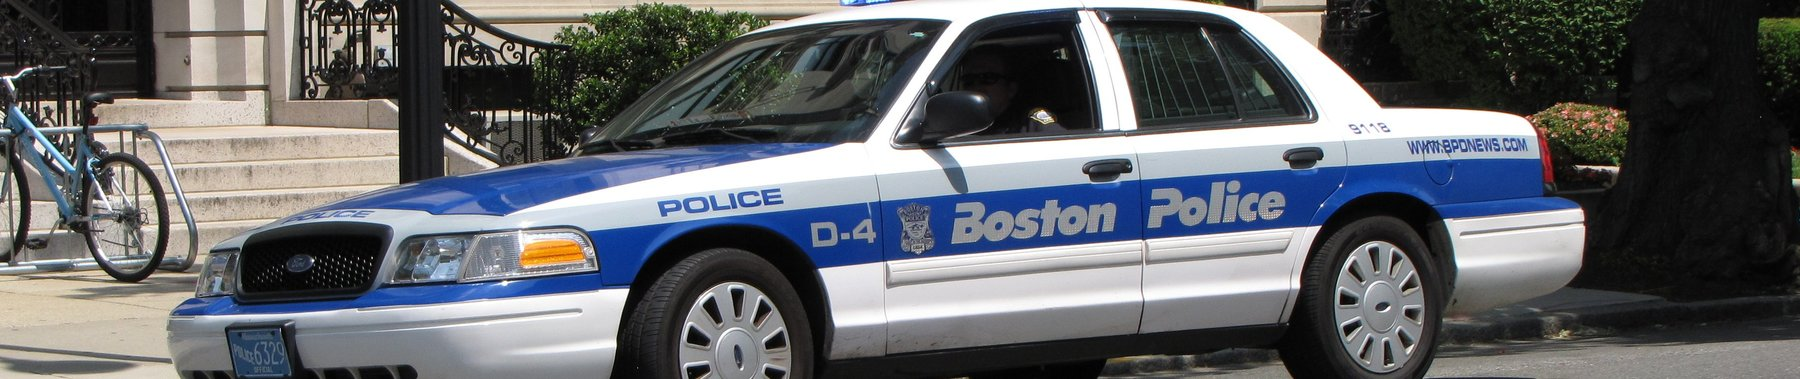

# Contexte

Cette base de données enrégistre les incidents de crimes dont la police de Boston a répondu. Elle comporte le type d'incident, ou et quand ça c'est produit.

# Contenu de la dataset:
Les données enrégistrées concernent les rapports d'incident de crime du 15 Juin 2015 au 15 Decembre 2020. Elles sont fournies par Analyze Boston.

Dictionnaire des variables:
 
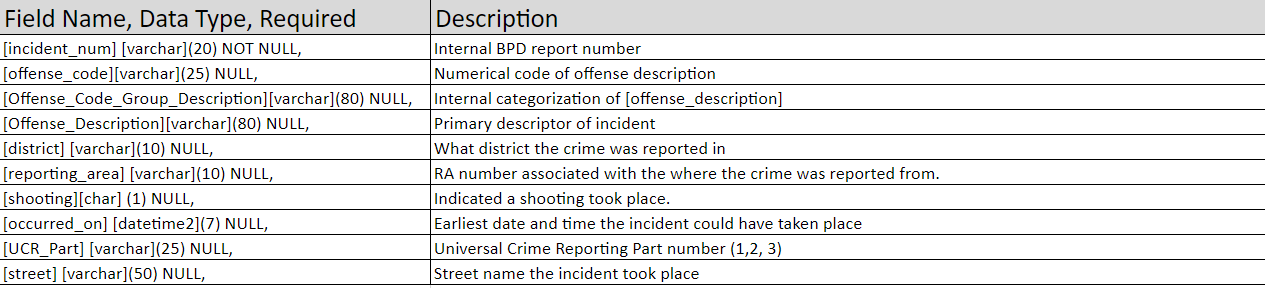



# Objectif de notre étude:

* Montrer à la police de Boston les zones qui nécessitent beaucoup plus d'attentions.
* Aider la police à mieux distribuer les ressources lors des patrouilles.

**Analyse Globale :**

Quels sont les types de crimes les plus fréquents à Boston?

Est-ce que le nombre de crimes varie selon le mois, le jour de la semaine ou bien l'heure?

Quelles sont les rues les plus dangéreuses de Boston?

**Notre étude sur les crimes suivantes :**

*Auto Theft

*Larceny

*Roberry

*Residential Burglary

# Chargement des bibliothèques 

In [ ]:
library("dplyr")
library("ggplot2")
library("tidyverse")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ purrr   0.3.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#Chargement de la Dataset




In [ ]:
# Définition du nom de fichier
file <- "/content/sample_data/crime_boston_clean.csv" 
# Chargement du fichier
df <- read.csv(file, header=TRUE, encoding = "UTF-8") 


# Analyse Exploratoire des données 

Examinons les 5 premières lignes de la Dataset : 

In [ ]:
head(df,5)

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,Aggravated Assault,ASSAULT - AGGRAVATED,External,No,2019-10-16 00:00:00,2019,10,Wednesday,0,RIVERVIEW DR,NA,NA,"(0.00000000, 0.00000000)"
2,Verbal Disputes,VERBAL DISPUTE,C6,No,2020-07-18 14:34:00,2020,7,Saturday,14,MARY BOYLE WAY,42.33081,-71.05137,"(42.33081300, -71.05136800)"
3,Other,THREATS TO DO BODILY HARM,E18,No,2020-06-24 10:15:00,2020,6,Wednesday,10,READVILLE ST,42.23949,-71.13595,"(42.23949100, -71.13595400)"
4,Verbal Disputes,VERBAL DISPUTE,E13,No,2019-12-20 03:08:00,2019,12,Friday,3,DAY ST,42.32512,-71.10778,"(42.32512200, -71.10777900)"
5,Investigate Person,INVESTIGATE PERSON,C11,No,2019-10-23 00:00:00,2019,10,Wednesday,0,GIBSON ST,42.29755,-71.05971,"(42.29755500, -71.05970900)"


In [ ]:
### Dimension des données

dim(df)

[1] 536055     13

Notre Dataset est composée de :


*   536 805 Observations
*   17 Charactéristiques


In [ ]:
#### Type de données pour chaque variable

str(df)

'data.frame':	536055 obs. of  13 variables:
 $ OFFENSE_CODE_GROUP : chr  "Aggravated Assault" "Verbal Disputes" "Other" "Verbal Disputes" ...
 $ OFFENSE_DESCRIPTION: chr  "ASSAULT - AGGRAVATED" "VERBAL DISPUTE" "THREATS TO DO BODILY HARM" "VERBAL DISPUTE" ...
 $ DISTRICT           : chr  "External" "C6" "E18" "E13" ...
 $ SHOOTING           : chr  "No" "No" "No" "No" ...
 $ OCCURRED_ON_DATE   : chr  "2019-10-16 00:00:00" "2020-07-18 14:34:00" "2020-06-24 10:15:00" "2019-12-20 03:08:00" ...
 $ YEAR               : int  2019 2020 2020 2019 2019 2019 2019 2019 2020 2020 ...
 $ MONTH              : int  10 7 6 12 10 11 11 11 5 3 ...
 $ DAY_OF_WEEK        : chr  "Wednesday" "Saturday" "Wednesday" "Friday" ...
 $ HOUR               : int  0 14 10 3 0 7 18 5 9 11 ...
 $ STREET             : chr  "RIVERVIEW DR" "MARY BOYLE WAY" "READVILLE ST" "DAY ST" ...
 $ Lat                : num  NA 42.3 42.2 42.3 42.3 ...
 $ Long               : num  NA -71.1 -71.1 -71.1 -71.1 ...
 $ Location           : 

Les variables sont de types : 

*   Character
*   integer
*   numeric

On allons convertir certaines variables de type chr en catégoriques:

In [ ]:
df['OFFENSE_CODE_GROUP'] <- as.character(df['OFFENSE_CODE_GROUP'])

Il y a 729433 valeurs manquantes:


*   OFFENSE_CODE_GROUP : 109966 
*   DISTRICT           : 2474
*   SHOOTING           : 425093
*   UCR_PART           : 110076
*STREET                : 22068
*Lat                   : 29878
*Long                  : 29878



# Visualisation et Interprétation des données :

Pour faciliter l'exploitation de la dataset, elle a été préablement nettoyée sous pyhton :
* Les variables qui ne sont pas utiles à l'étude ont été supprimées.
* Les lignes duppliquées sont enlevées.
* Des valeurs manquantes de la variable "OFFENSE_CODE_GROUP" ont été mises à jour.

#**Nombre de Crimes à Boston :**

`summarise()` ungrouping output (override with `.groups` argument)



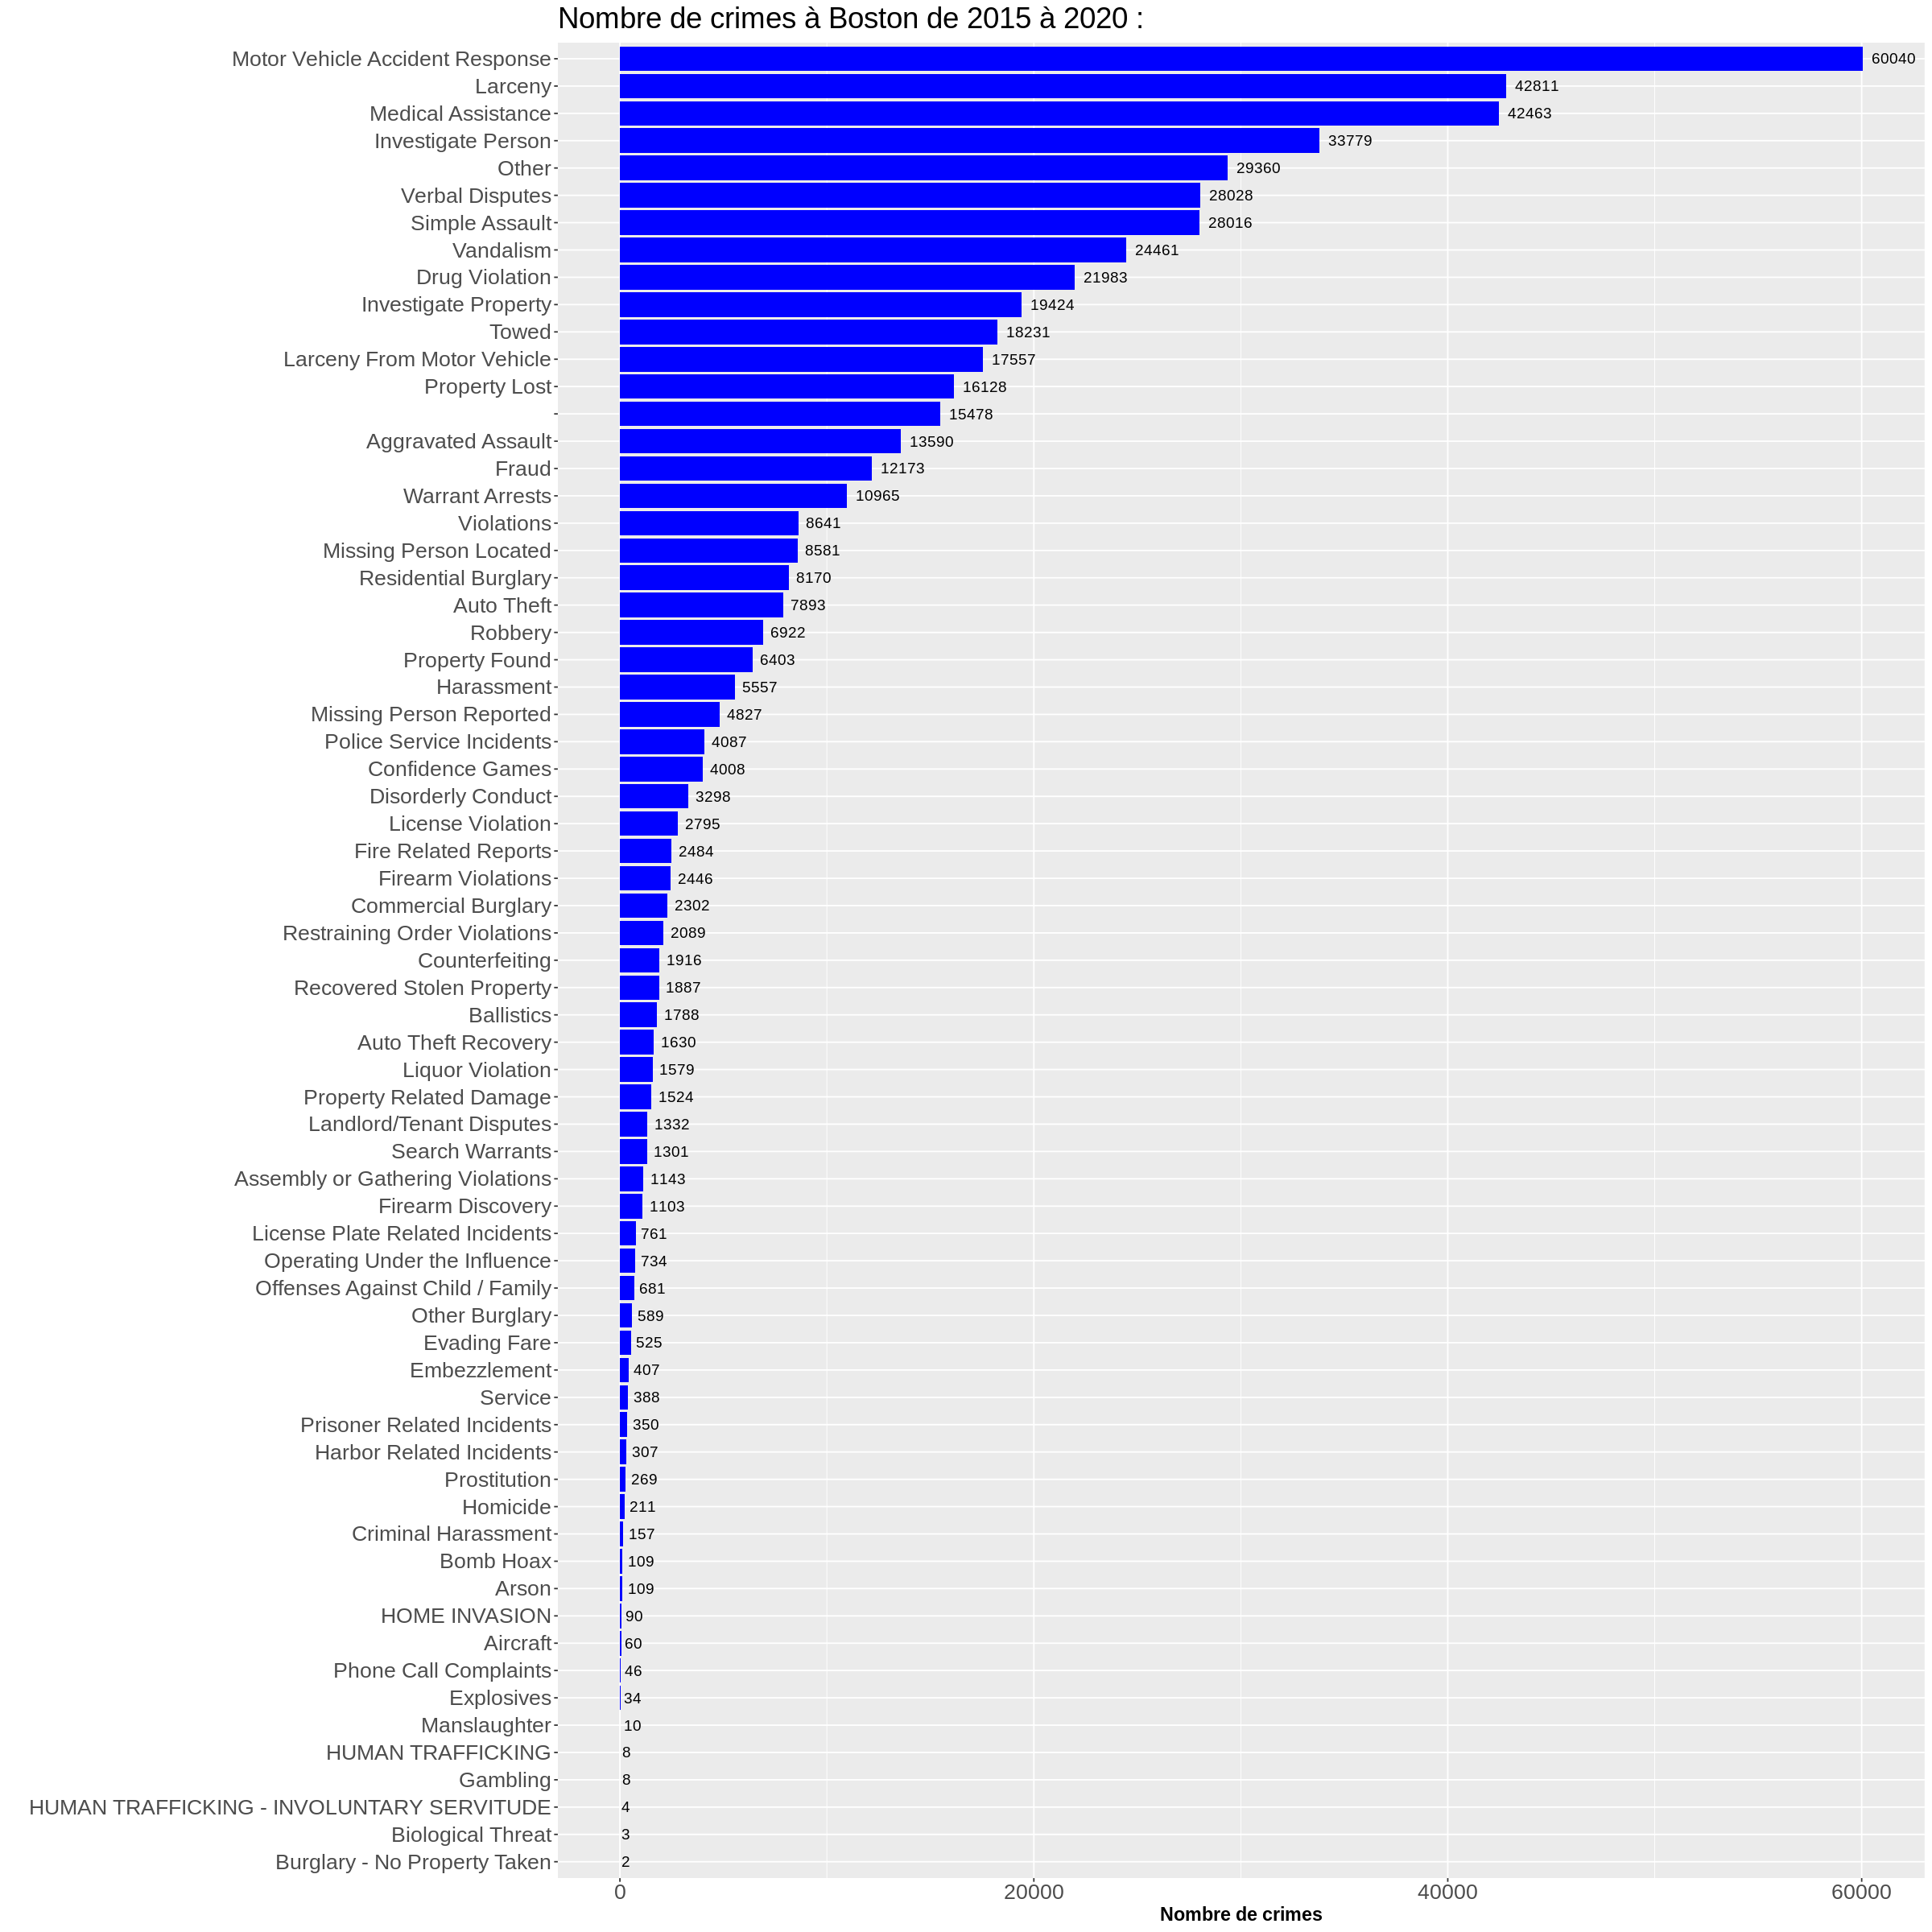

In [ ]:
# Configuration de la taille l'affichage des graphiques 
options(repr.plot.width = 20, repr.plot.height = 20)

subset <- df %>%
                 select(OFFENSE_CODE_GROUP) %>%
                 group_by(OFFENSE_CODE_GROUP) %>%
                 summarise(nb = n()) %>%
                 arrange(desc(nb))

ggplot(data=subset,aes(x = reorder(OFFENSE_CODE_GROUP, nb), nb))+
#ggplot(data=subset,aes(x=Sport,y=nb))+
geom_bar(stat="identity",fill='blue')+
theme(axis.text=element_text(size=16,angle = 0),axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=22))+
ggtitle("Nombre de crimes à Boston de 2015 à 2020 : ") +
xlab("") + 
ylab("Nombre de crimes")+
geom_text(aes(label=nb), hjust=-0.2, color="black", size=4)+
coord_flip()

#**Top 10 des crimes les plus fréquents à Boston :**

`summarise()` ungrouping output (override with `.groups` argument)

Selecting by nb



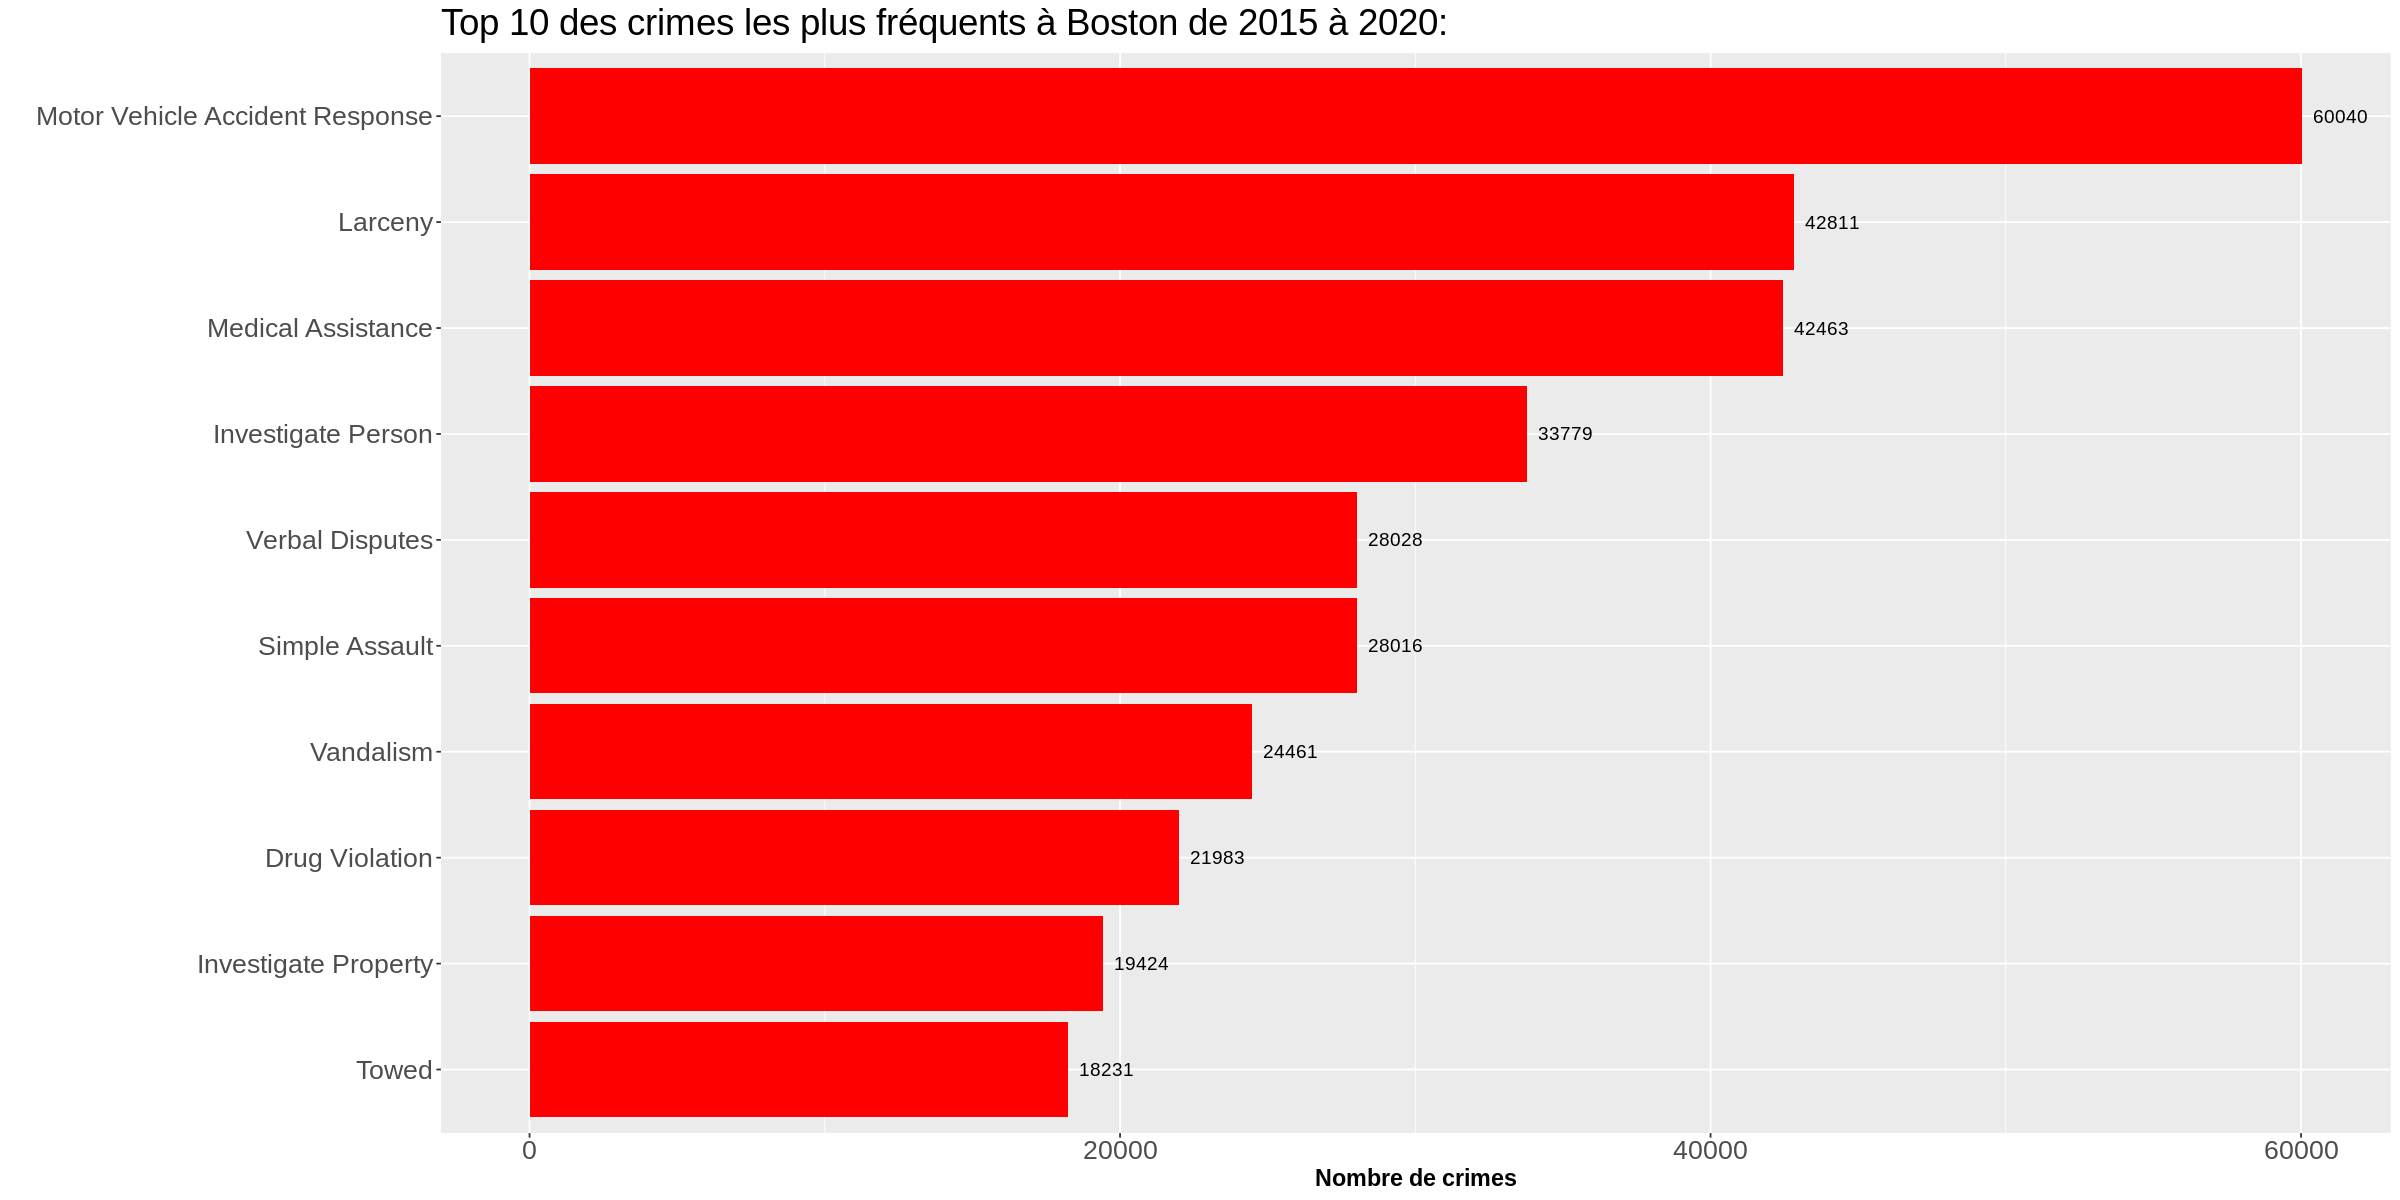

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

subset <- df %>%
          select(OFFENSE_CODE_GROUP) %>%
          filter(OFFENSE_CODE_GROUP != "Other") %>%
          group_by(OFFENSE_CODE_GROUP) %>%
          summarise(nb = n()) %>%
          arrange(desc(nb))%>%
          top_n(10)

ggplot(data=subset,aes(x = reorder(OFFENSE_CODE_GROUP, nb), nb))+
geom_bar(stat="identity",fill='red')+
theme(axis.text=element_text(size=16,angle = 0),axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=22))+
ggtitle("Top 10 des crimes les plus fréquents à Boston de 2015 à 2020:") +
xlab("") + 
ylab("Nombre de crimes")+
geom_text(aes(label=nb), hjust=-0.2, color="black", size=4)+
coord_flip()

#**Nombre de crimes par année :**

`summarise()` ungrouping output (override with `.groups` argument)



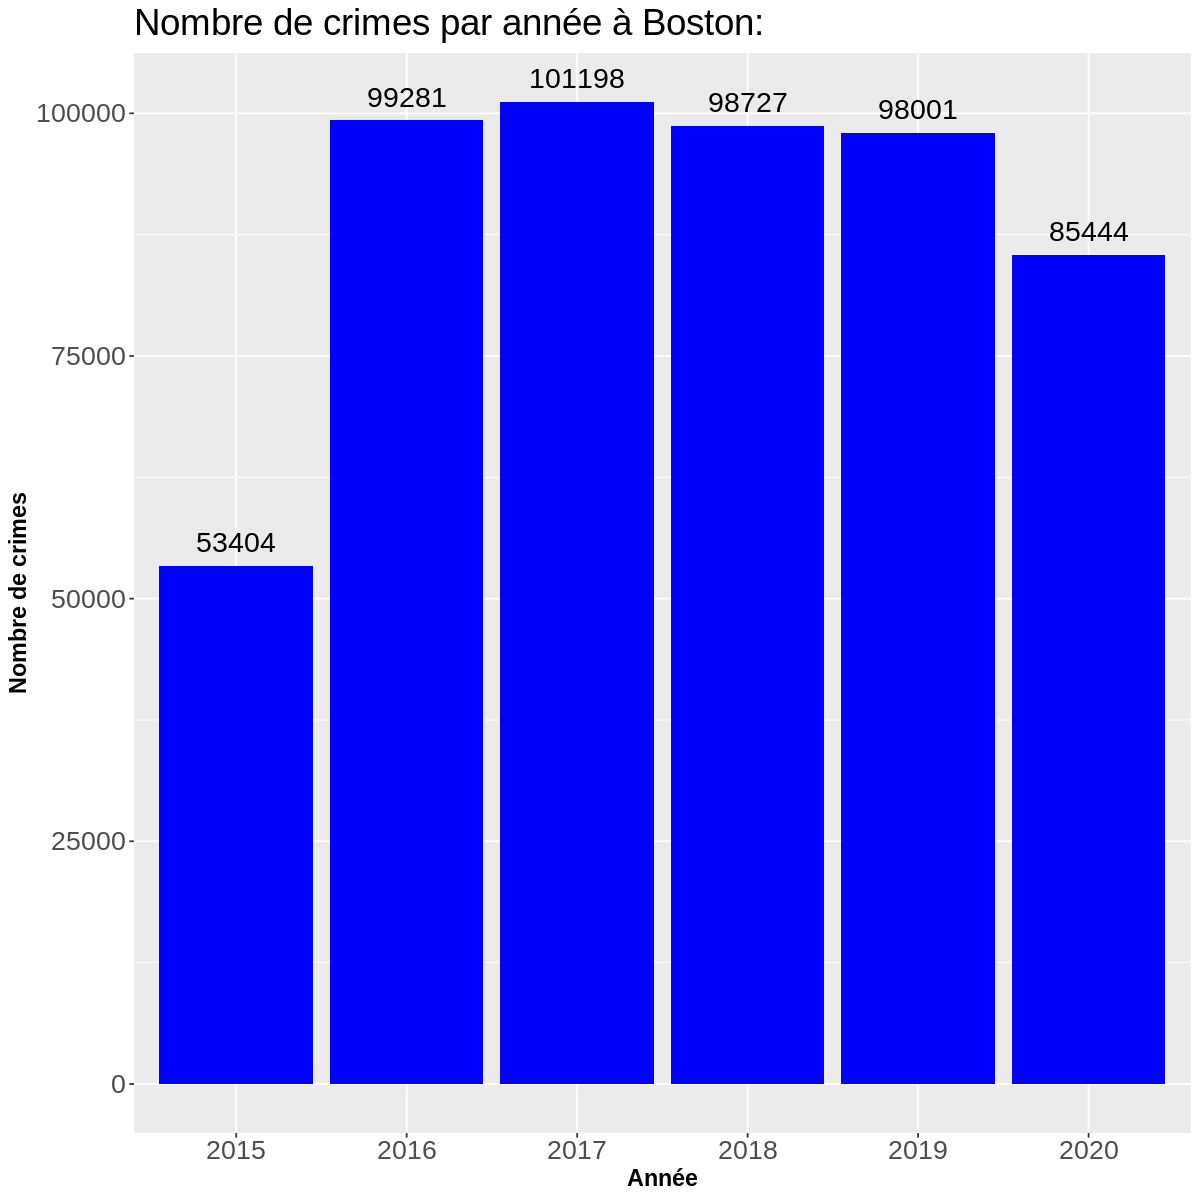

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
subset <- df %>%
                  select(YEAR) %>%
                  group_by(YEAR)%>%
                  summarise(nb = n())
          
ggplot(data=subset,aes(x = as.character(YEAR),y = nb))+
geom_bar(stat="identity",fill='blue')+
theme(axis.text=element_text(size=16,angle = 0),axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=22))+
ggtitle("Nombre de crimes par année à Boston:") + 
xlab("Année") + 
ylab("Nombre de crimes")+
geom_text(aes(label=nb), vjust=-0.7, color="black", size=6)


Dans ce graphe, on peut voir que les années 2016,2017,2018,2019 ont les plus grands taux de criminalités dans la région. 

#**Top 30 Street les plus dangéreux :** 

`summarise()` ungrouping output (override with `.groups` argument)

Selecting by nb



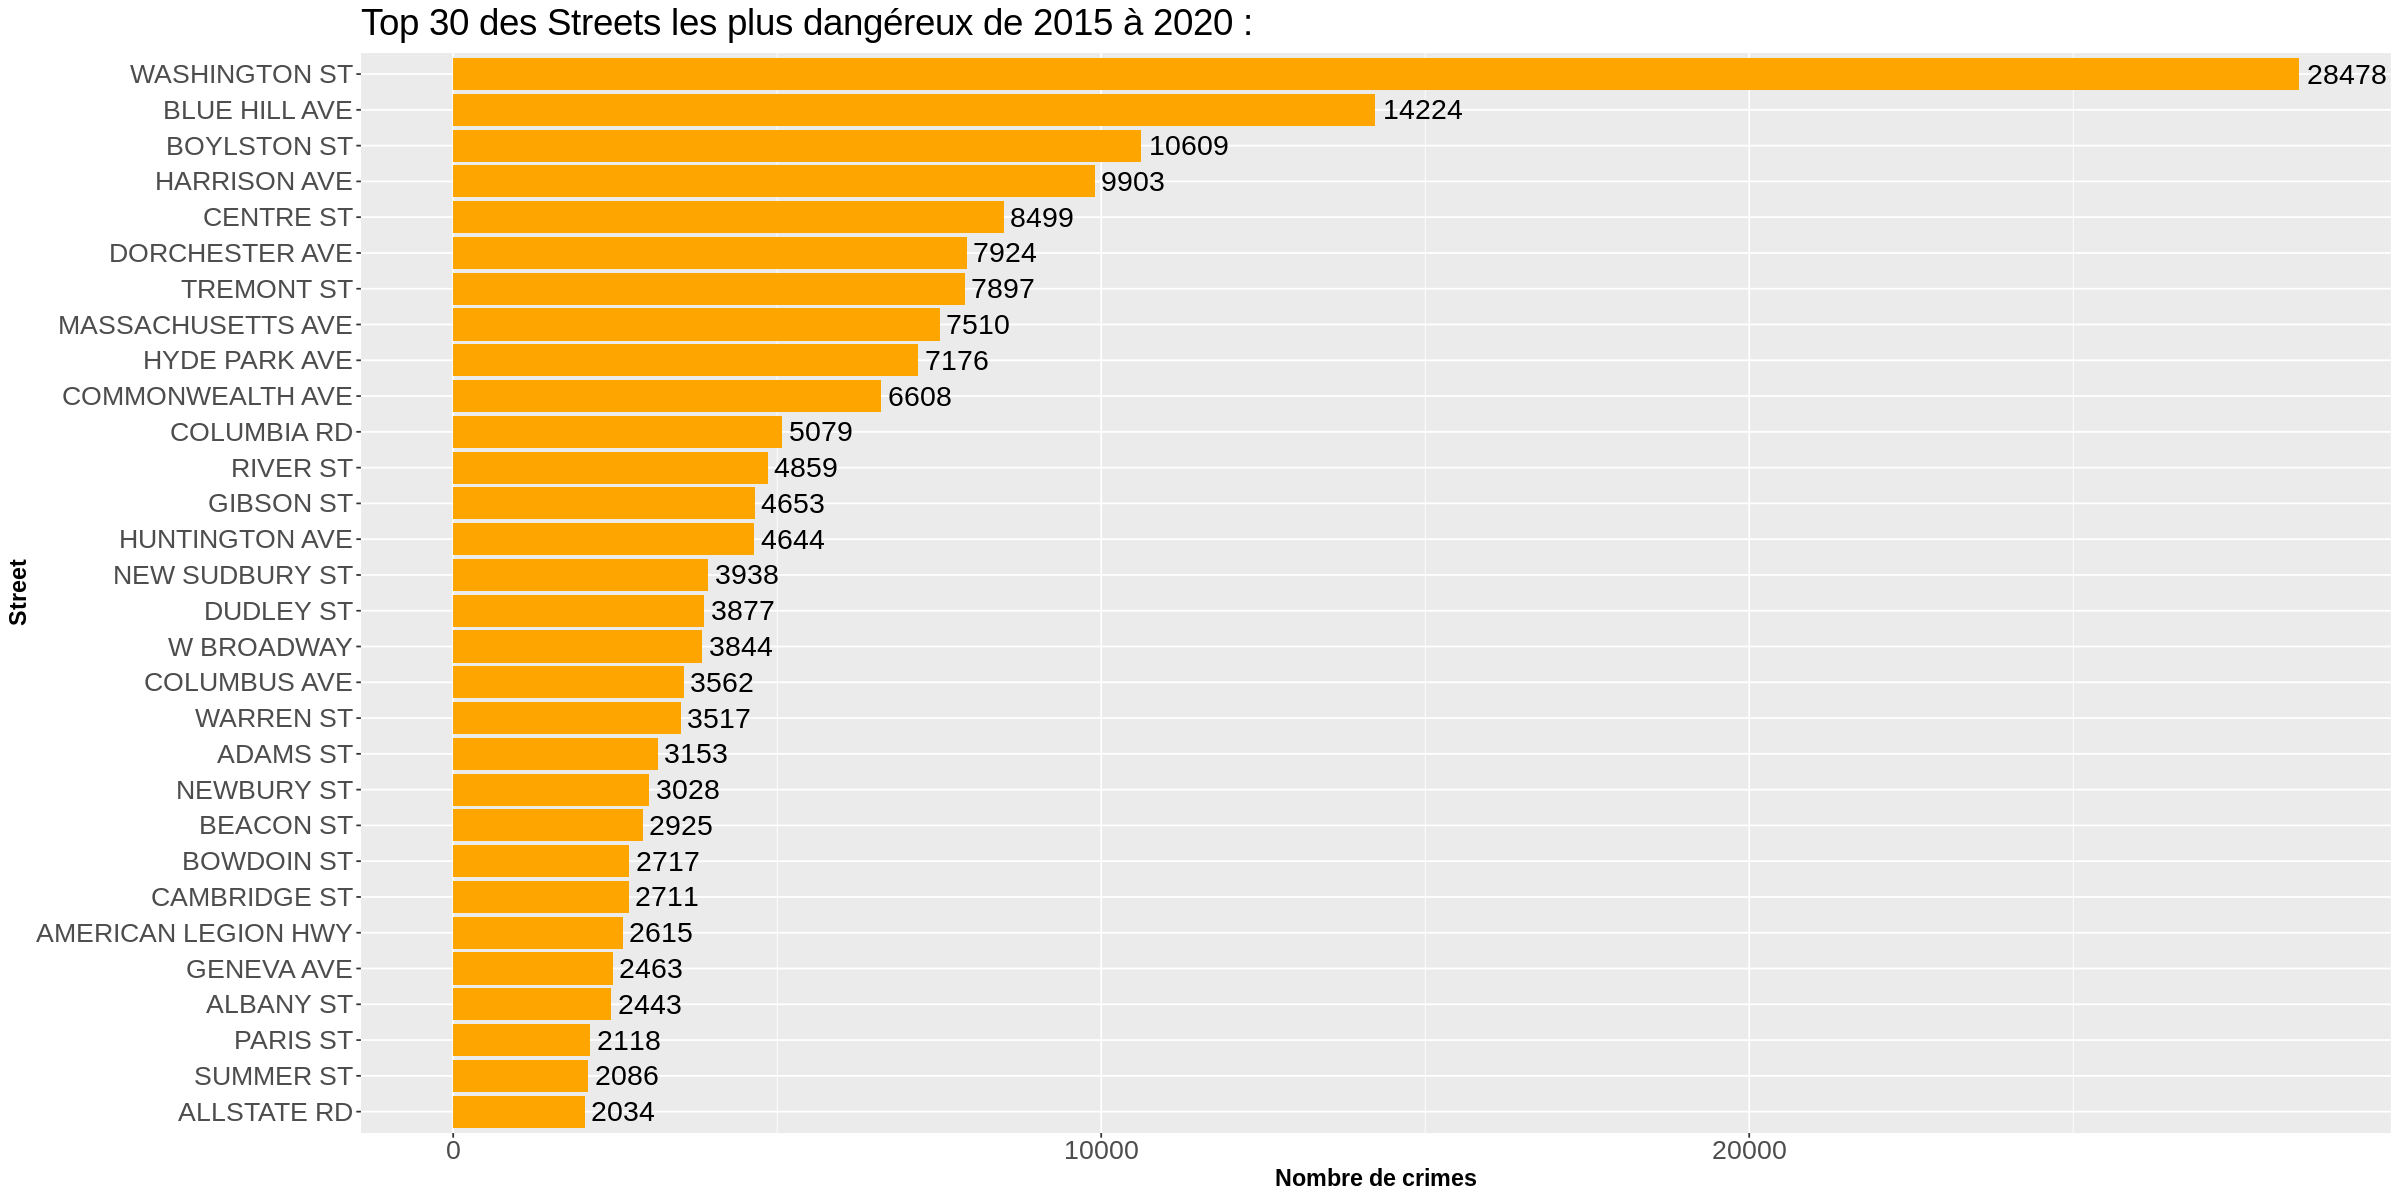

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)
subset <- df %>%
          filter(STREET!='') %>%
          select(STREET) %>%
          group_by(STREET)%>%
          summarise(nb = n()) %>%
          arrange(desc(nb)) %>%
          top_n(30)

ggplot(data=subset,aes(x = reorder(STREET, nb), nb,y = nb))+
geom_bar(stat="identity",fill='orange')+
theme(axis.text=element_text(size=16,angle = 0),axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=22))+
ggtitle("Top 30 des Streets les plus dangéreux de 2015 à 2020 :") + 
xlab("Street") + 
ylab("Nombre de crimes")+
geom_text(aes(label=nb), hjust=-0.1, color="black", size=6)+
coord_flip()

WASHINGTON ST est de loin la rue la plus dangéreuse de Boston.

# **Nombre de crimes par mois :**



`summarise()` ungrouping output (override with `.groups` argument)



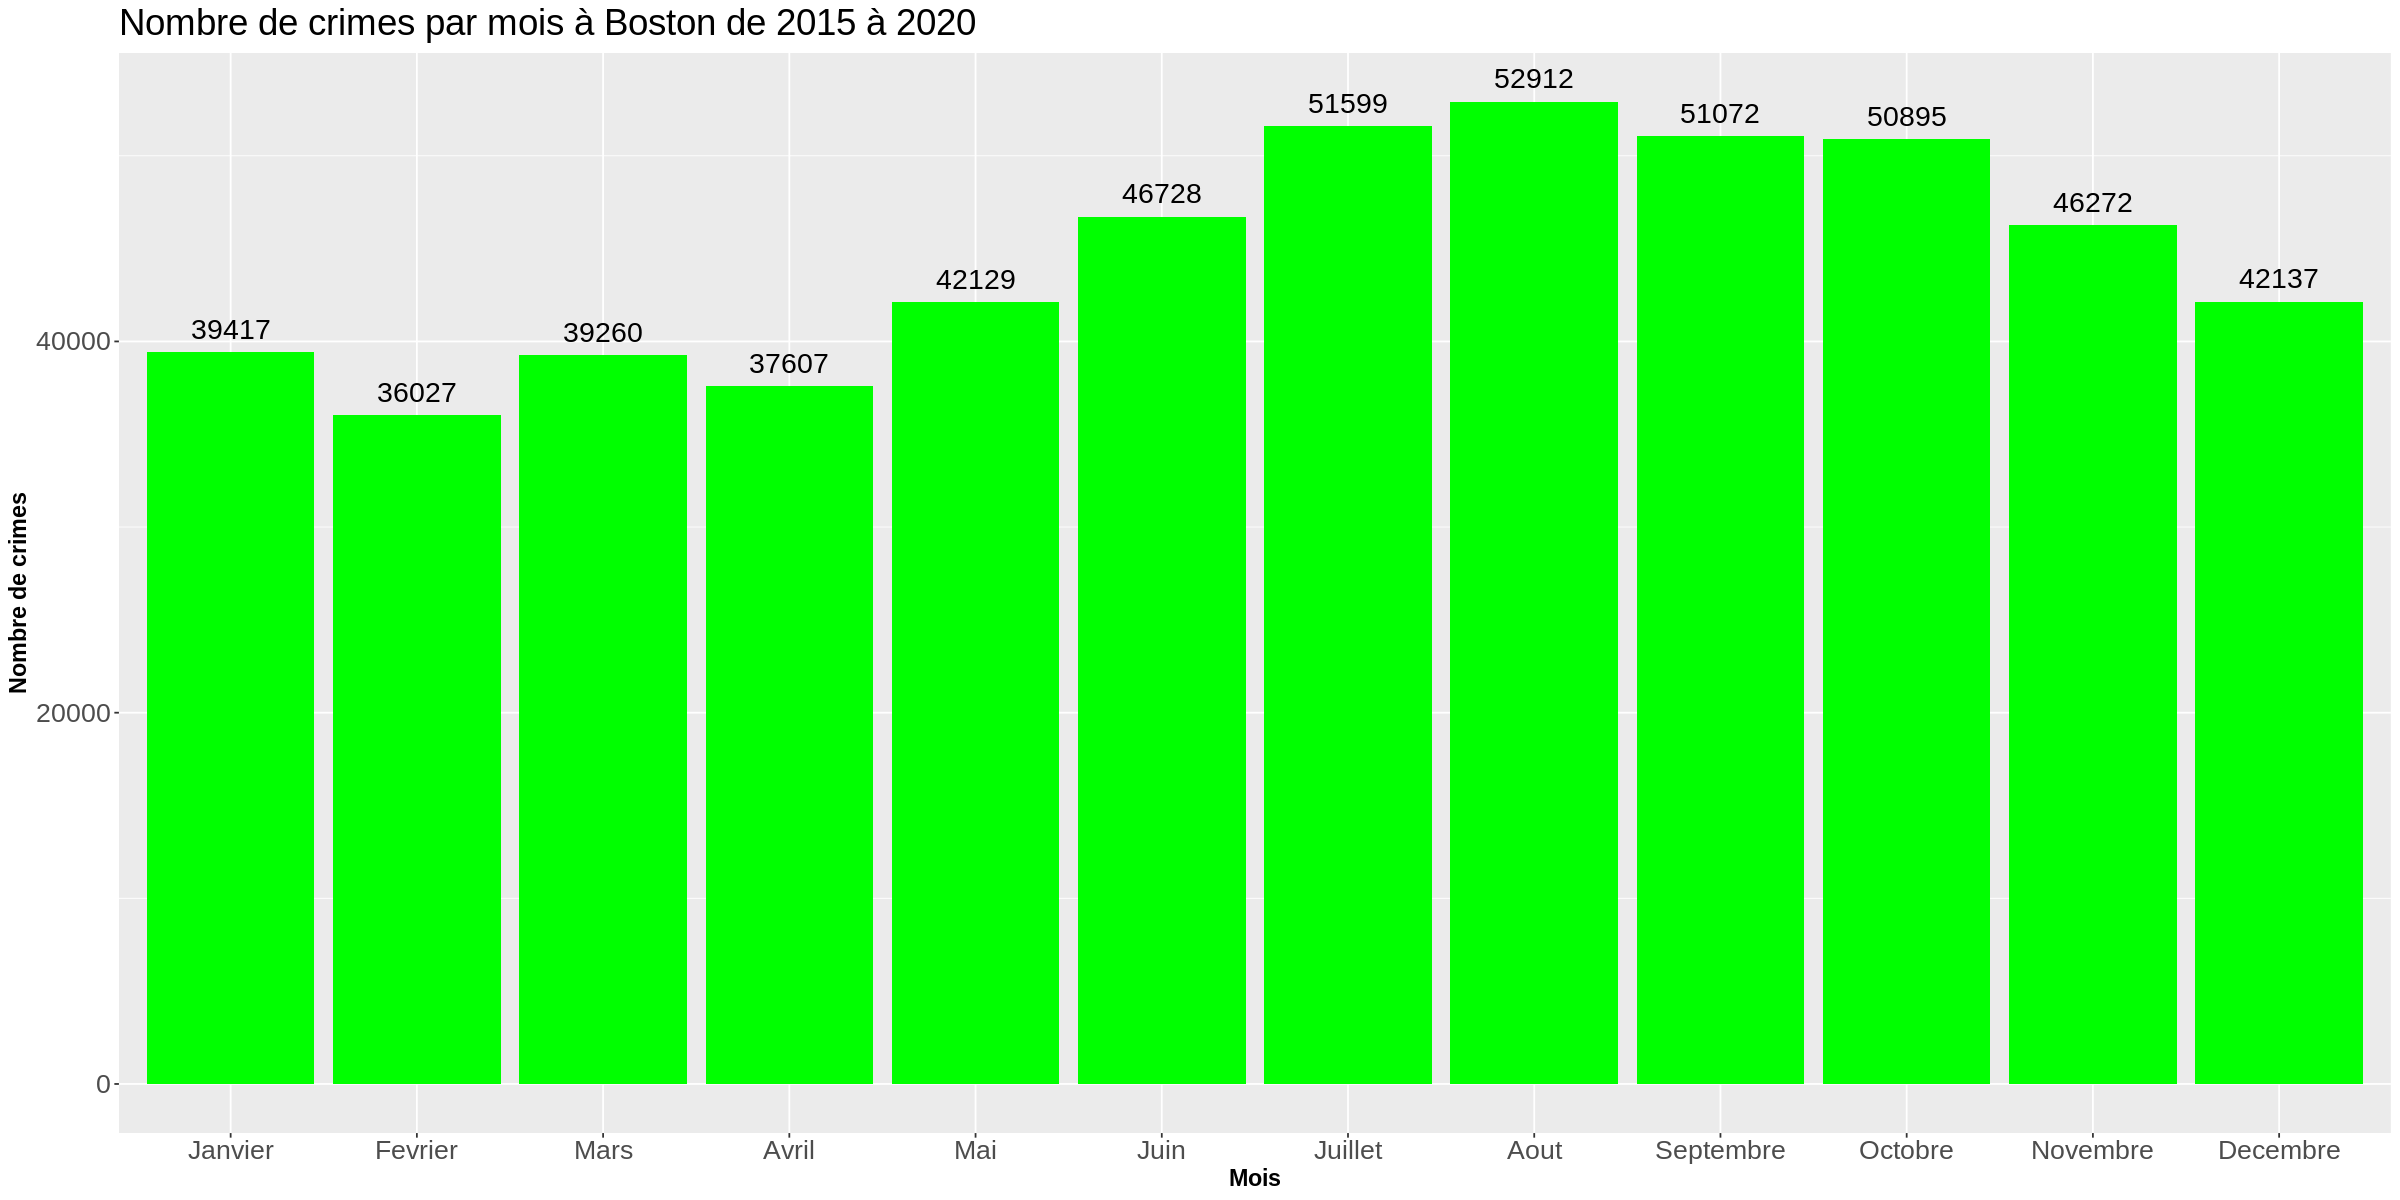

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

subset <- df %>%
                  select(MONTH) %>%
                  group_by(MONTH)%>%
                  summarise(nb = n())

mois <- c('Janvier','Fevrier','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Decembre')

ggplot(data=subset,aes(x = as.factor(MONTH),y = nb))+
geom_bar(stat="identity",fill='green')+
theme(axis.text=element_text(size=16,angle = 0),axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=22))+
ggtitle("Nombre de crimes par mois à Boston de 2015 à 2020") + 
xlab("Mois") + 
ylab("Nombre de crimes")+
geom_text(aes(label=nb), vjust=-0.7, color="black", size=6)+
scale_x_discrete(breaks=c("1","2","3","4","5","6","7","8","9","10","11","12"),labels=mois)


Le mois aussi semble avoir une influence :
* On a le plus bas niveau pendant l'hiver : Février-Avril
* On atteint le plus au niveau pendant le debut de l'été :  Juillet-Octobre.
* Il y a aussi un pic de la criminalité au mois de Janvier.

#**Nombre de crimes par jour :**

`summarise()` ungrouping output (override with `.groups` argument)



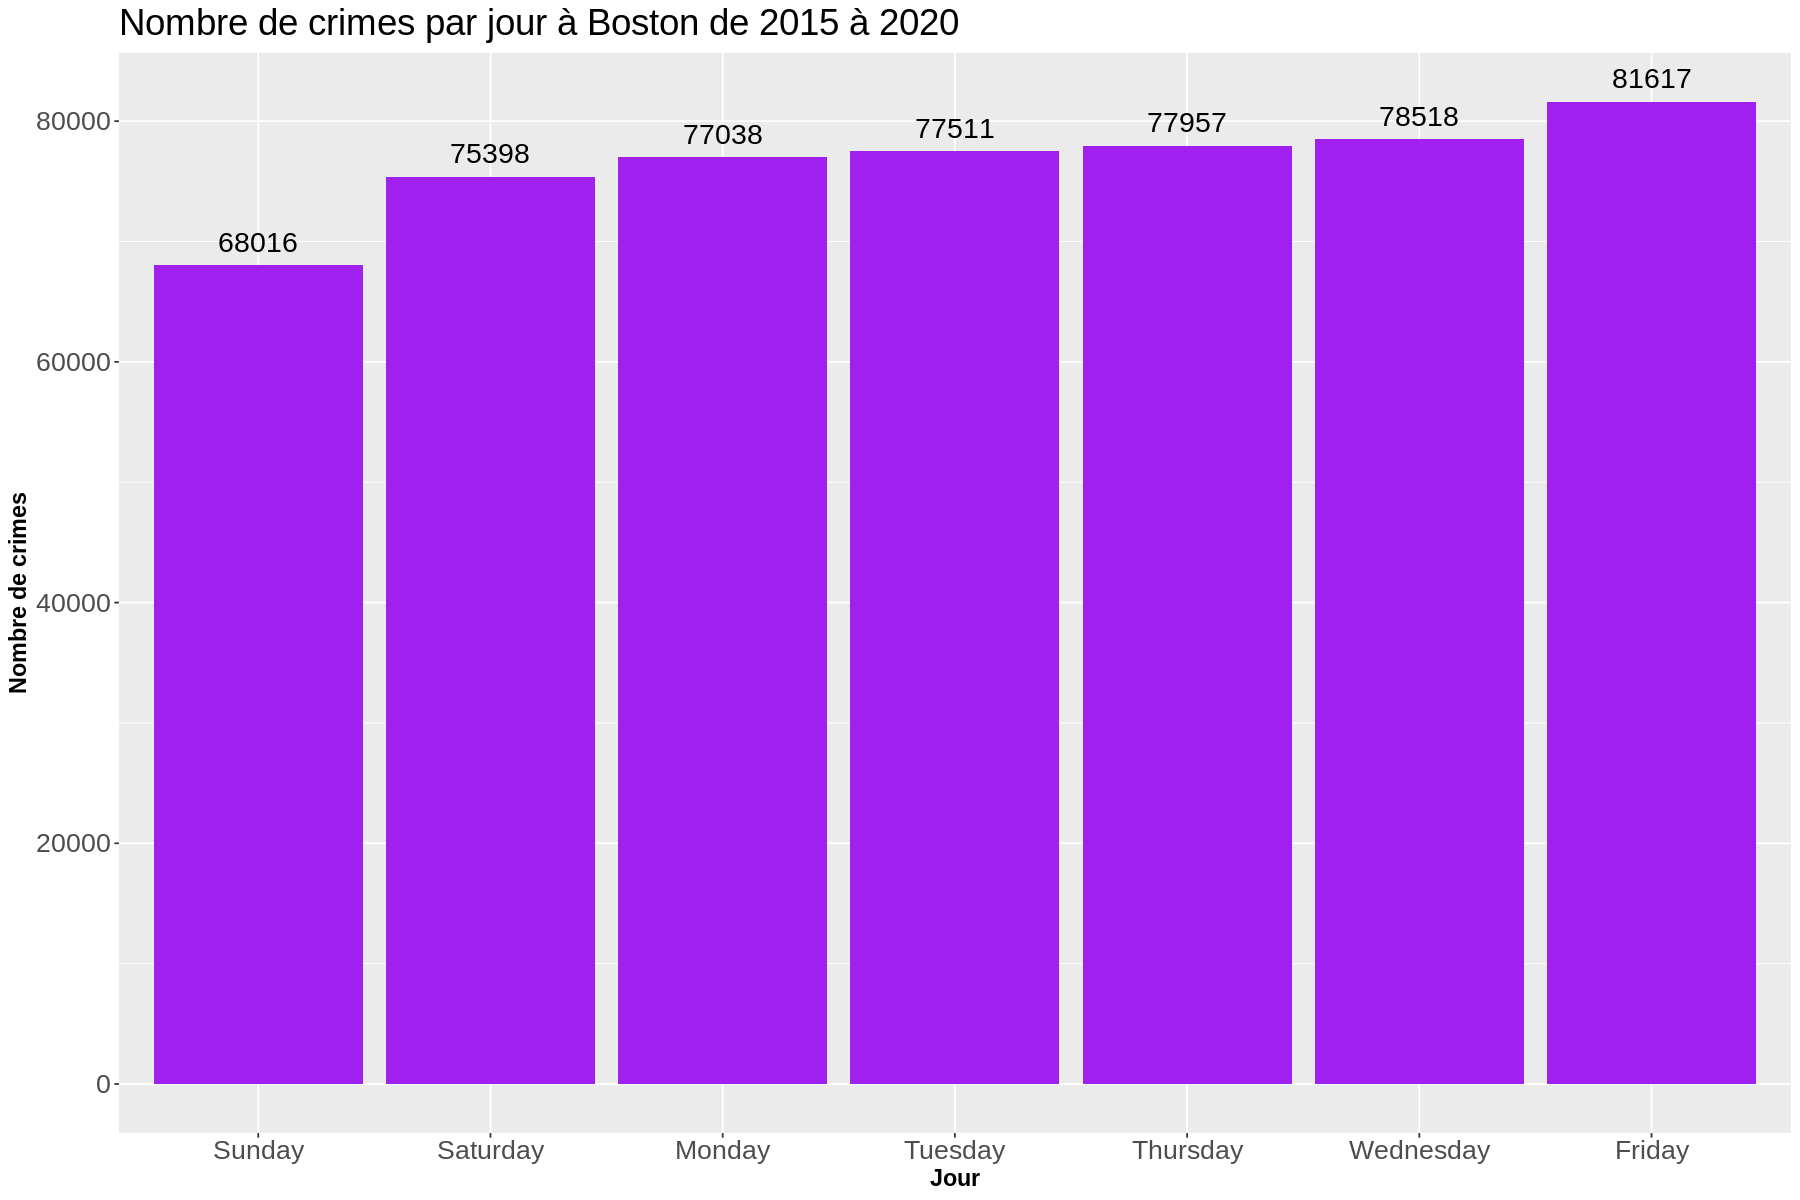

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)

subset <- df %>%
                  select(DAY_OF_WEEK) %>%
                  group_by(DAY_OF_WEEK)%>%
                  summarise(nb = n())

ggplot(data=subset,aes(x = reorder(DAY_OF_WEEK, nb), nb,y = nb))+
geom_bar(stat="identity",fill='purple')+
theme(axis.text=element_text(size=16,angle = 0),axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=22))+
ggtitle("Nombre de crimes par jour à Boston de 2015 à 2020") + 
xlab("Jour") + 
ylab("Nombre de crimes")+
geom_text(aes(label=nb), vjust=-0.7, color="black", size=6)

* Il y a quelques variations selon le jour de la semaine.
* Il y a plus de crimes le vendredi.
* On moins de crimes le dimanche.

#**Nombre de crimes par Heure :** 

`summarise()` ungrouping output (override with `.groups` argument)



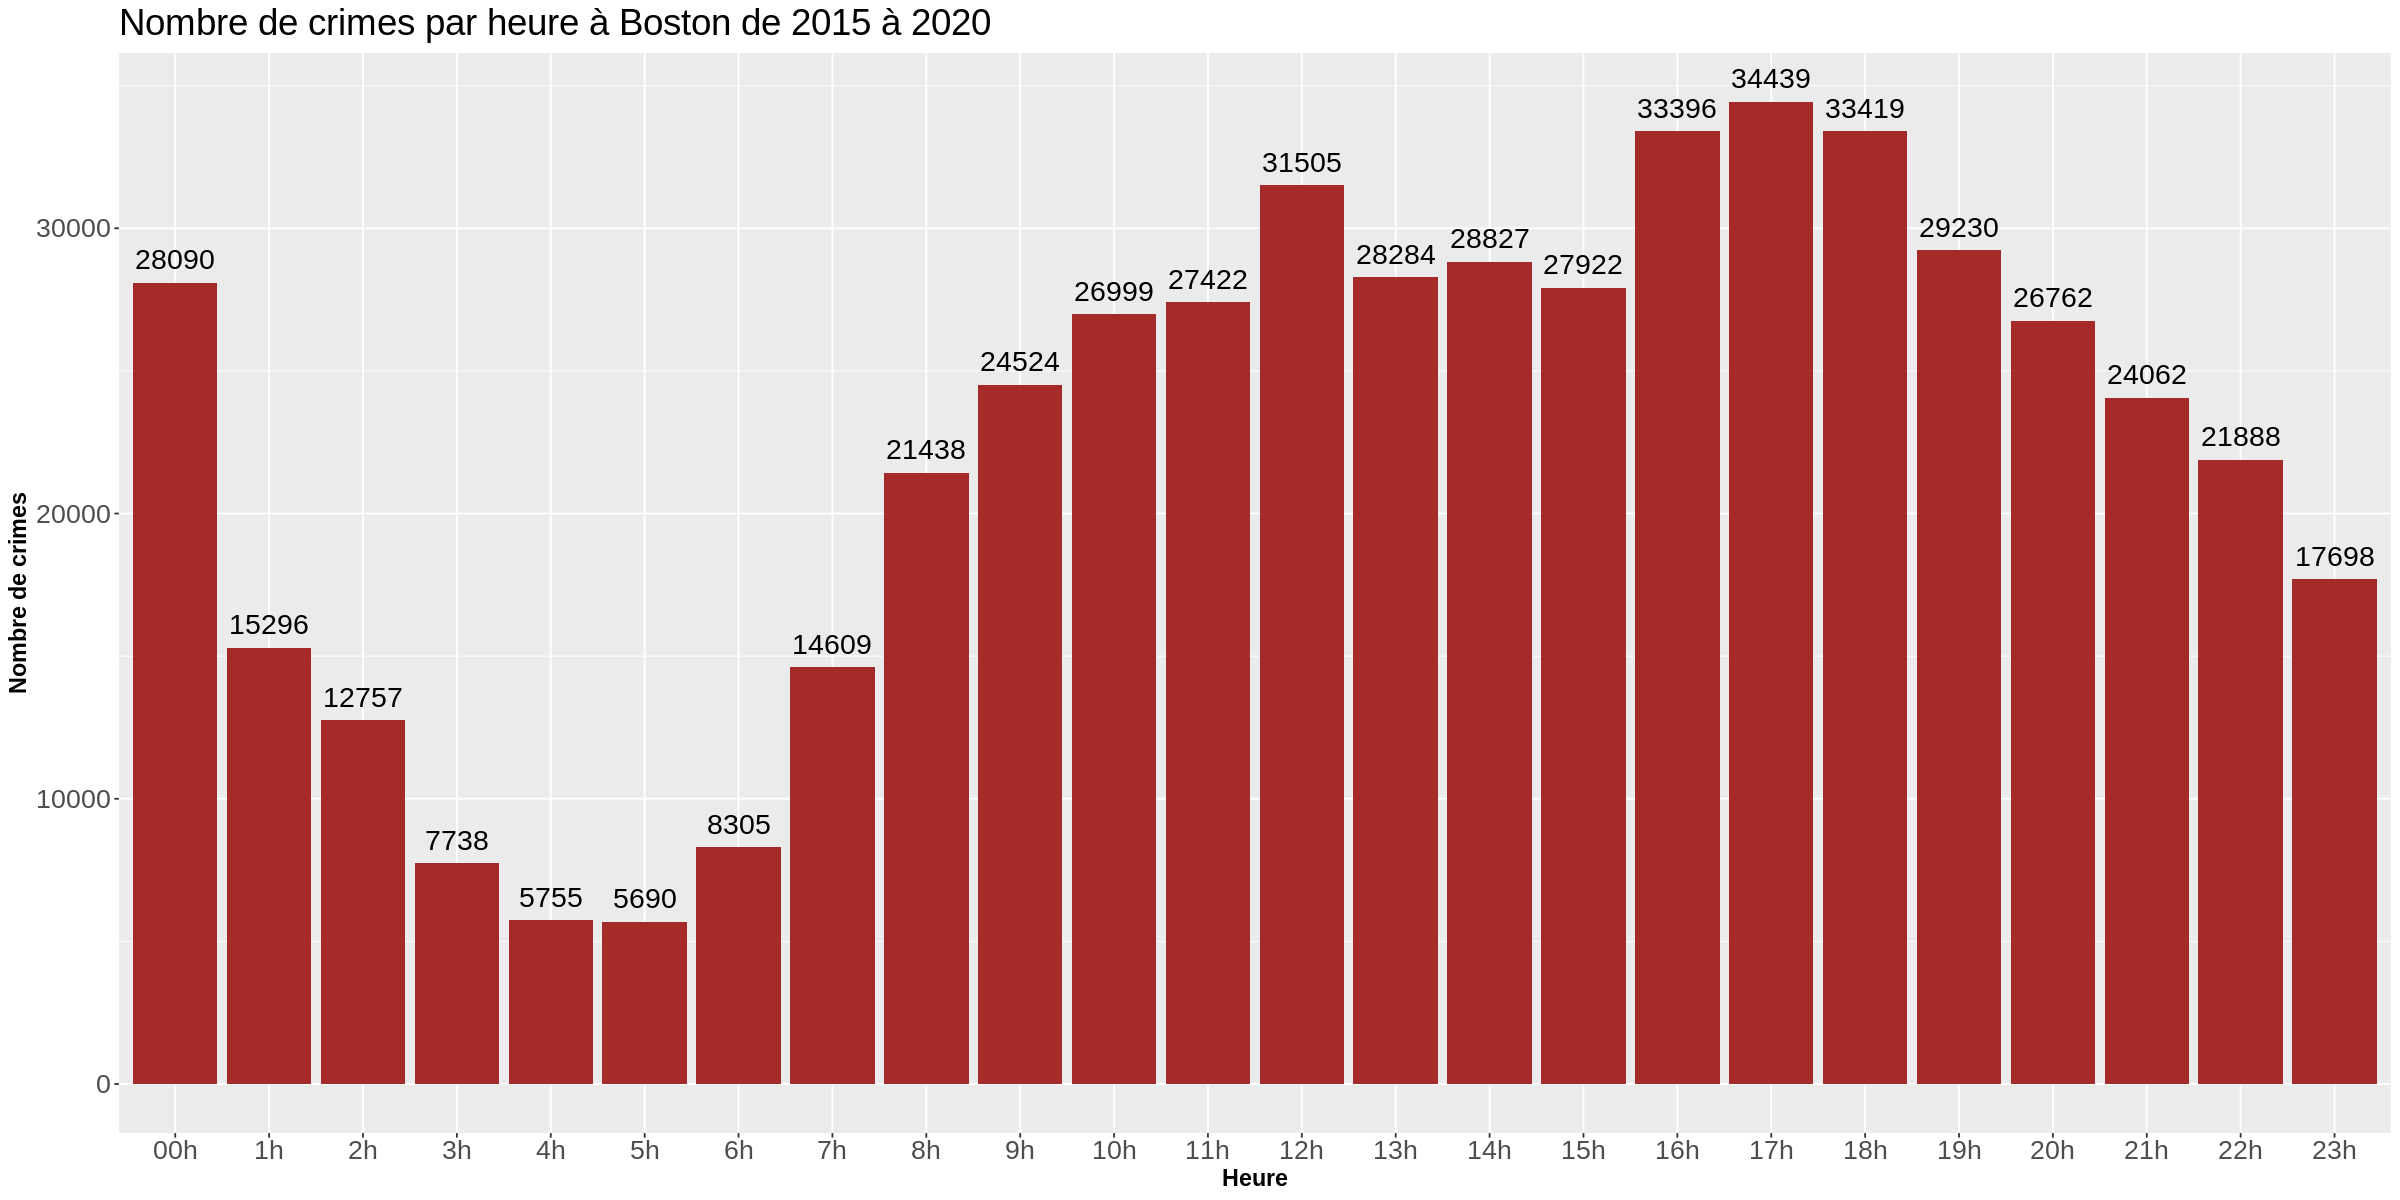

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

subset <- df %>%
                  select(HOUR) %>%
                  group_by(HOUR)%>%
                  summarise(nb = n())

heure <- c("00h","1h","2h","3h","4h","5h","6h","7h","8h","9h","10h","11h","12h","13h","14h","15h","16h","17h","18h","19h","20h","21h","22h","23h")

ggplot(data=subset,aes(x = as.factor(HOUR),y = nb))+
geom_bar(stat="identity",fill='brown')+
theme(axis.text=element_text(size=16,angle = 0),axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=22))+
ggtitle("Nombre de crimes par heure à Boston de 2015 à 2020") + 
xlab("Heure") + 
ylab("Nombre de crimes")+
geom_text(aes(label=nb), vjust=-0.7, color="black", size=6)+
scale_x_discrete(breaks=c('0','1','2','3','4','5',"6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"),labels=heure)

Le nombre de crimes est bas de 01h à 08h du matin et augmente graduellement dans la journée. On atteint le pic vers 17h.

#Notre étude sur les crimes suivantes : Auto Theft-Larceny-Robbery-Residential Burglary

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 3)
crimes <- c("Auto Theft","Larceny","Robbery","Residential Burglary")

subset <- df %>%
          filter(OFFENSE_CODE_GROUP %in% crimes)%>%
          group_by(OFFENSE_CODE_GROUP)%>%
          summarise(nb = n())

ggplot(data=subset,aes(x = reorder(OFFENSE_CODE_GROUP, nb), nb))+
#ggplot(data=subset,aes(x=Sport,y=nb))+
geom_bar(stat="identity",fill='blue')+
theme(axis.text=element_text(size=16,angle = 0),axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=22))+
ggtitle("Nombre de crimes à Boston de 2015 à 2020 : ") +
xlab("") + 
ylab("Nombre de crimes")+
geom_text(aes(label=nb), hjust=-0.2, color="black", size=4)+
coord_flip()

**Auto Theft :** Vol de voitures

`summarise()` regrouping output by 'YEAR' (override with `.groups` argument)



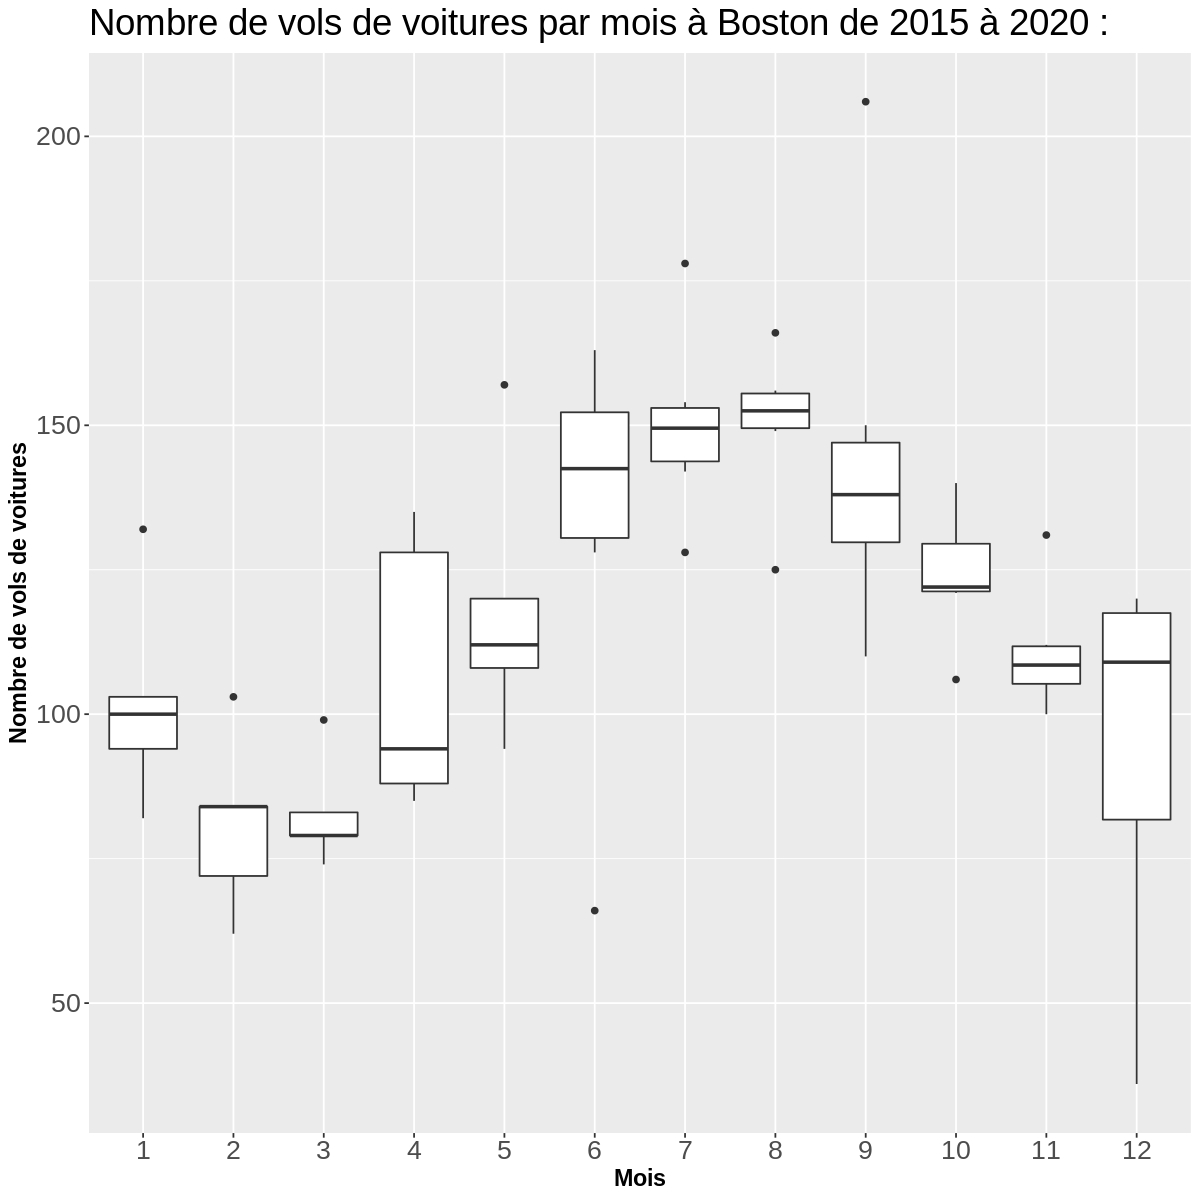

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)

subset <- df %>%
          filter(OFFENSE_CODE_GROUP == "Auto Theft") %>%
          select(OFFENSE_CODE_GROUP,MONTH,YEAR) %>%
          group_by(YEAR,MONTH) %>%
          summarise(nb = n())

ggplot(data = subset, aes(x=as.factor(MONTH),y=nb)) +
geom_boxplot()+
theme(axis.text=element_text(size=16,angle = 0),axis.title=element_text(size=14,face="bold"),plot.title = element_text(size=22))+
ggtitle("Nombre de vols de voitures par mois à Boston de 2015 à 2020 : ") +
xlab("Mois") + 
ylab("Nombre de vols de voitures")
#subset



*   On observe une tendance haussière entre Avril et Aout.
*   La tendance est baissière après le mois d'Aout.
* Il y' a moins de vols de voitures au mois de Février et Mars.



**Larceny :** Vol

`summarise()` ungrouping output (override with `.groups` argument)



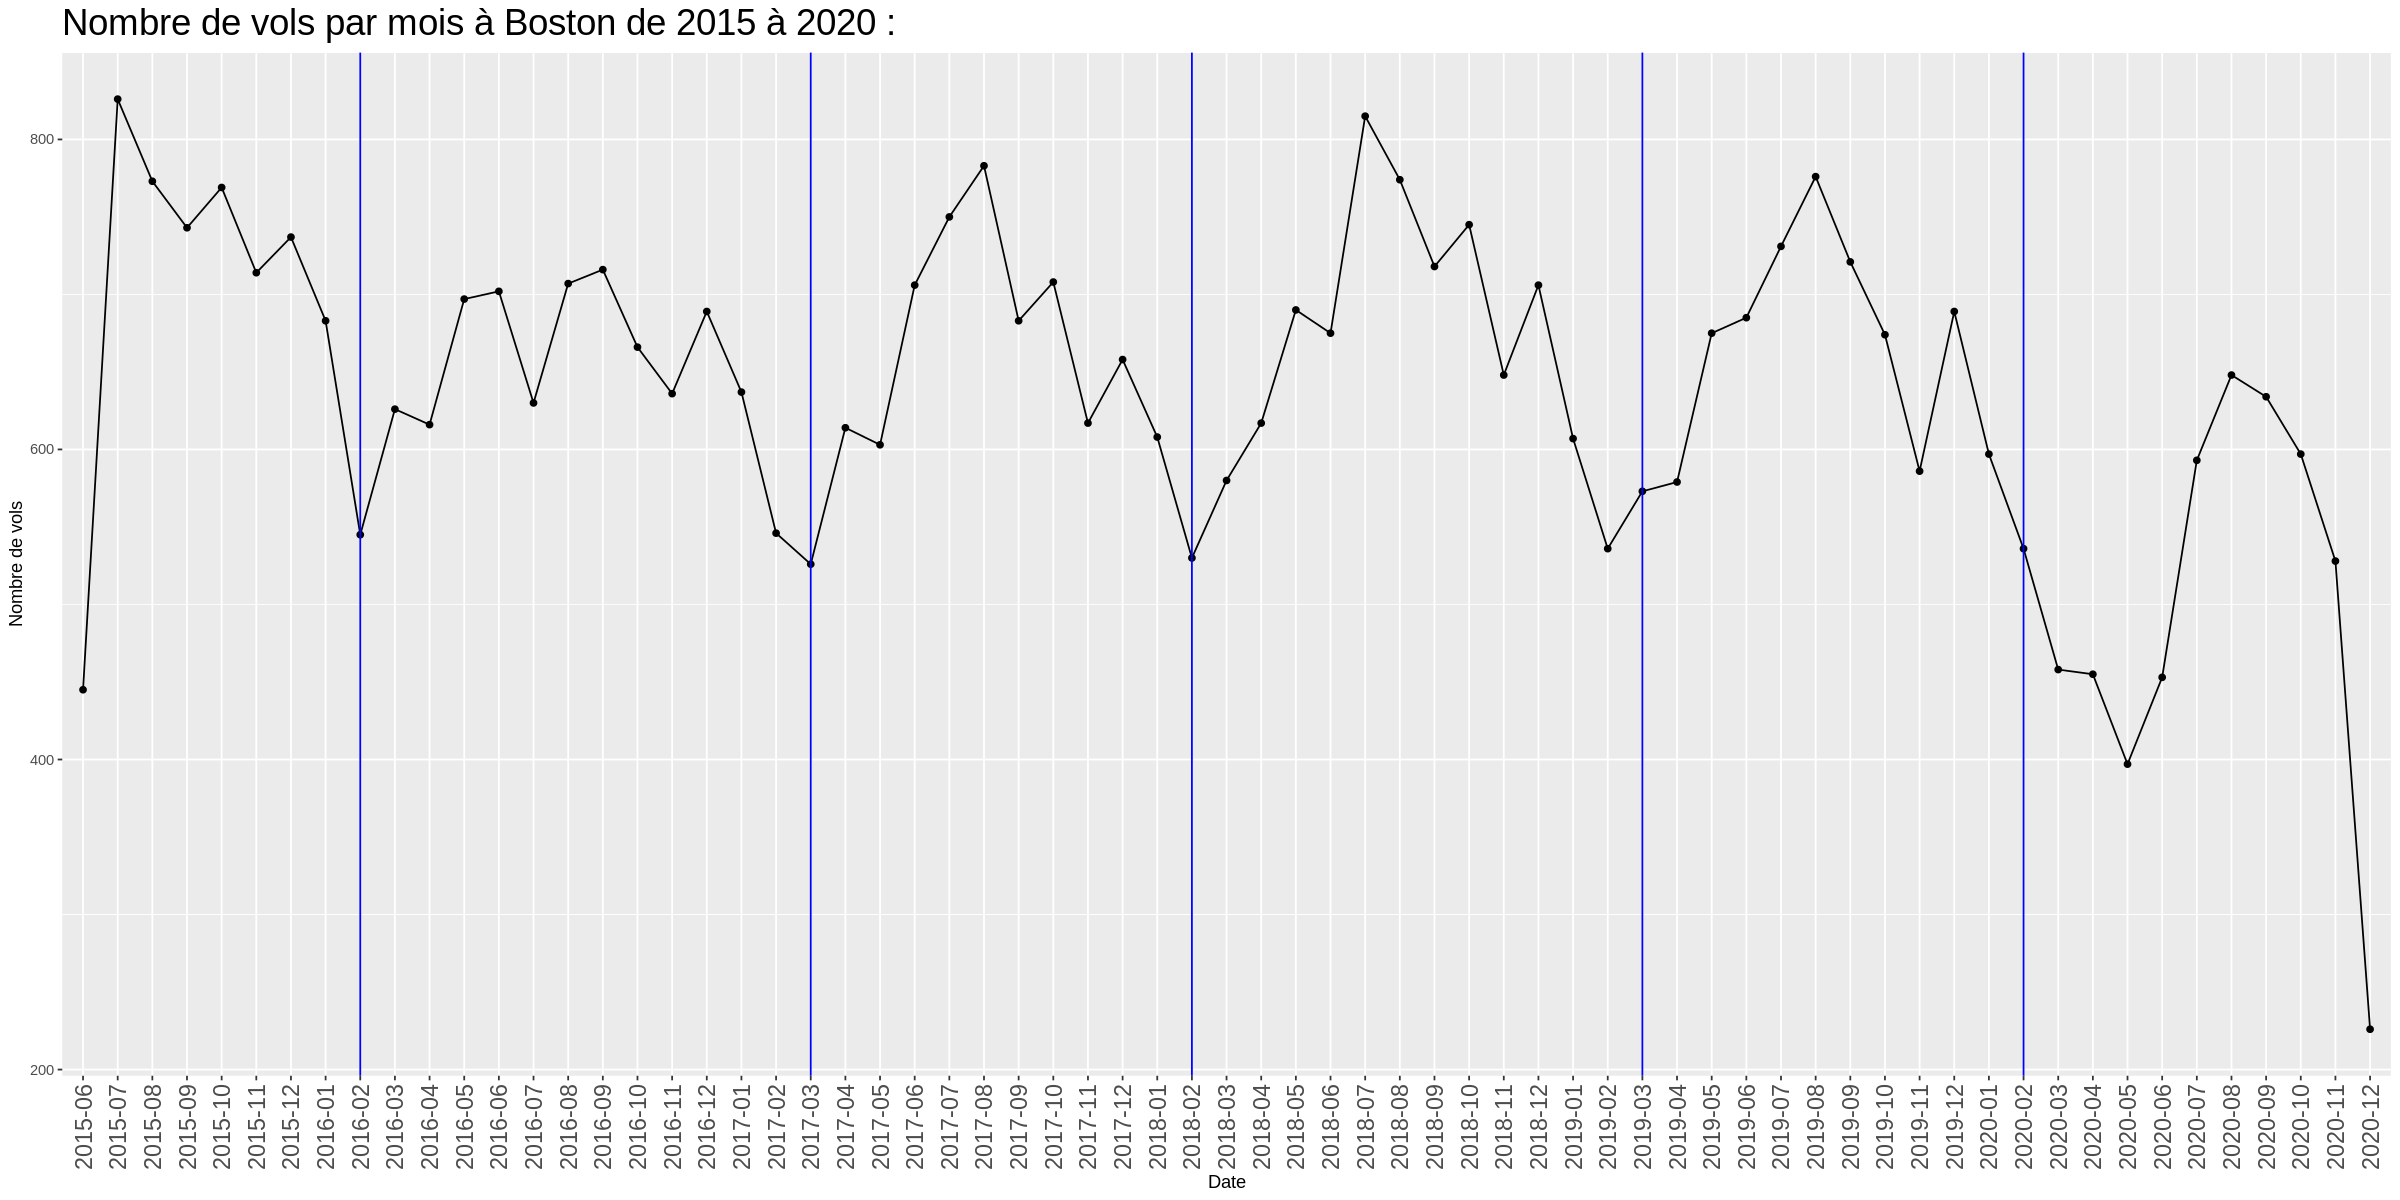

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

subset <- df %>%
          filter(OFFENSE_CODE_GROUP == "Larceny") %>%
          mutate(Month_yr = factor(substr(OCCURRED_ON_DATE,0,7)))%>%
          select(OFFENSE_CODE_GROUP,Month_yr)%>%
          group_by(Month_yr)%>%

          summarise(nb = n())


ggplot(data = subset,aes(x = Month_yr,y=nb,group=1))+
geom_point(stat='summary', fun=sum) +
stat_summary(fun=sum, geom="line")+
theme(axis.text.x = element_text(size=14,angle = 90, vjust = 0.5, hjust=1),plot.title = element_text(size=22))+
geom_vline(xintercept = c("2016-02","2017-03","2018-02","2019-03","2020-02"),color="blue")+
ggtitle("Nombre de vols par mois à Boston de 2015 à 2020 : ") +
xlab("Date") + 
ylab("Nombre de vols")


*   On constate une périodicité des vols entre Février et Mars.

*   On atteint le pic au mois de Juillet et Aout pendant les vacances.



**Robbery :** Vol à main armée

`summarise()` ungrouping output (override with `.groups` argument)



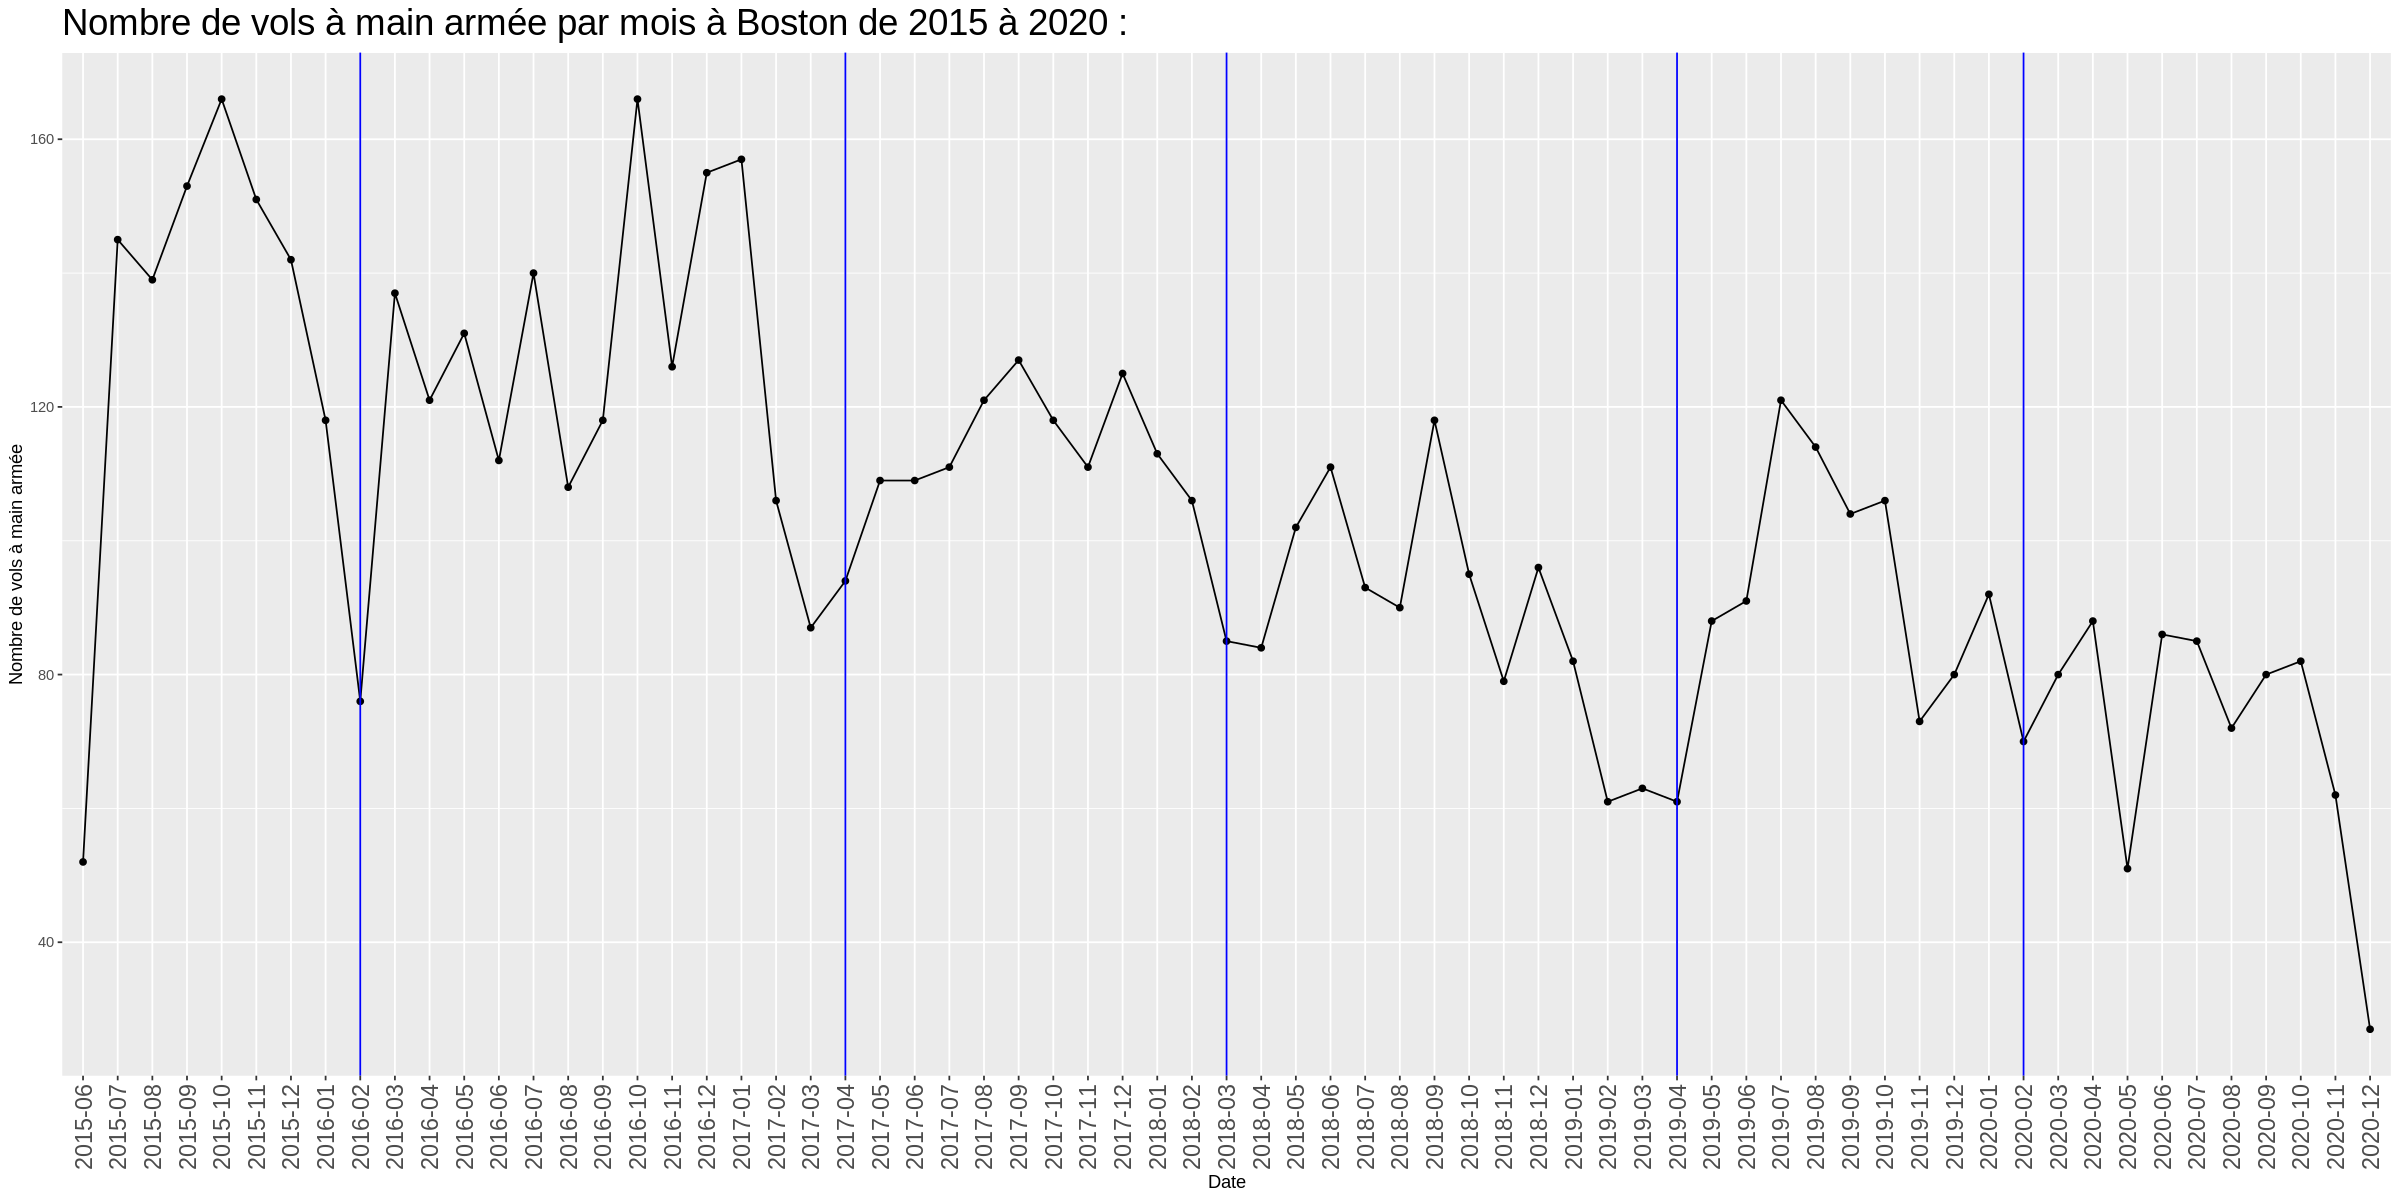

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

subset <- df %>%
          filter(OFFENSE_CODE_GROUP == "Robbery") %>%
          mutate(Month_yr = factor(substr(OCCURRED_ON_DATE,0,7)))%>%
          select(OFFENSE_CODE_GROUP,Month_yr)%>%
          group_by(Month_yr)%>%

          summarise(nb = n())


ggplot(data = subset,aes(x = Month_yr,y=nb,group=1))+
geom_point(stat='summary', fun=sum) +
stat_summary(fun=sum, geom="line")+
theme(axis.text.x = element_text(size=14,angle = 90, vjust = 0.5, hjust=1),plot.title = element_text(size=22))+
geom_vline(xintercept = c("2016-02","2017-04","2018-03","2019-04","2020-02"),color="blue")+
ggtitle("Nombre de vols à main armée par mois à Boston de 2015 à 2020 : ") +
xlab("Date") + 
ylab("Nombre de vols à main armée")



*   Il y a une periodicité des vols à main armée entre Février et Avril.
*   Mais la tendance est baissière au fil des années.



**Residential Burglary :** Cambriolage

`summarise()` ungrouping output (override with `.groups` argument)



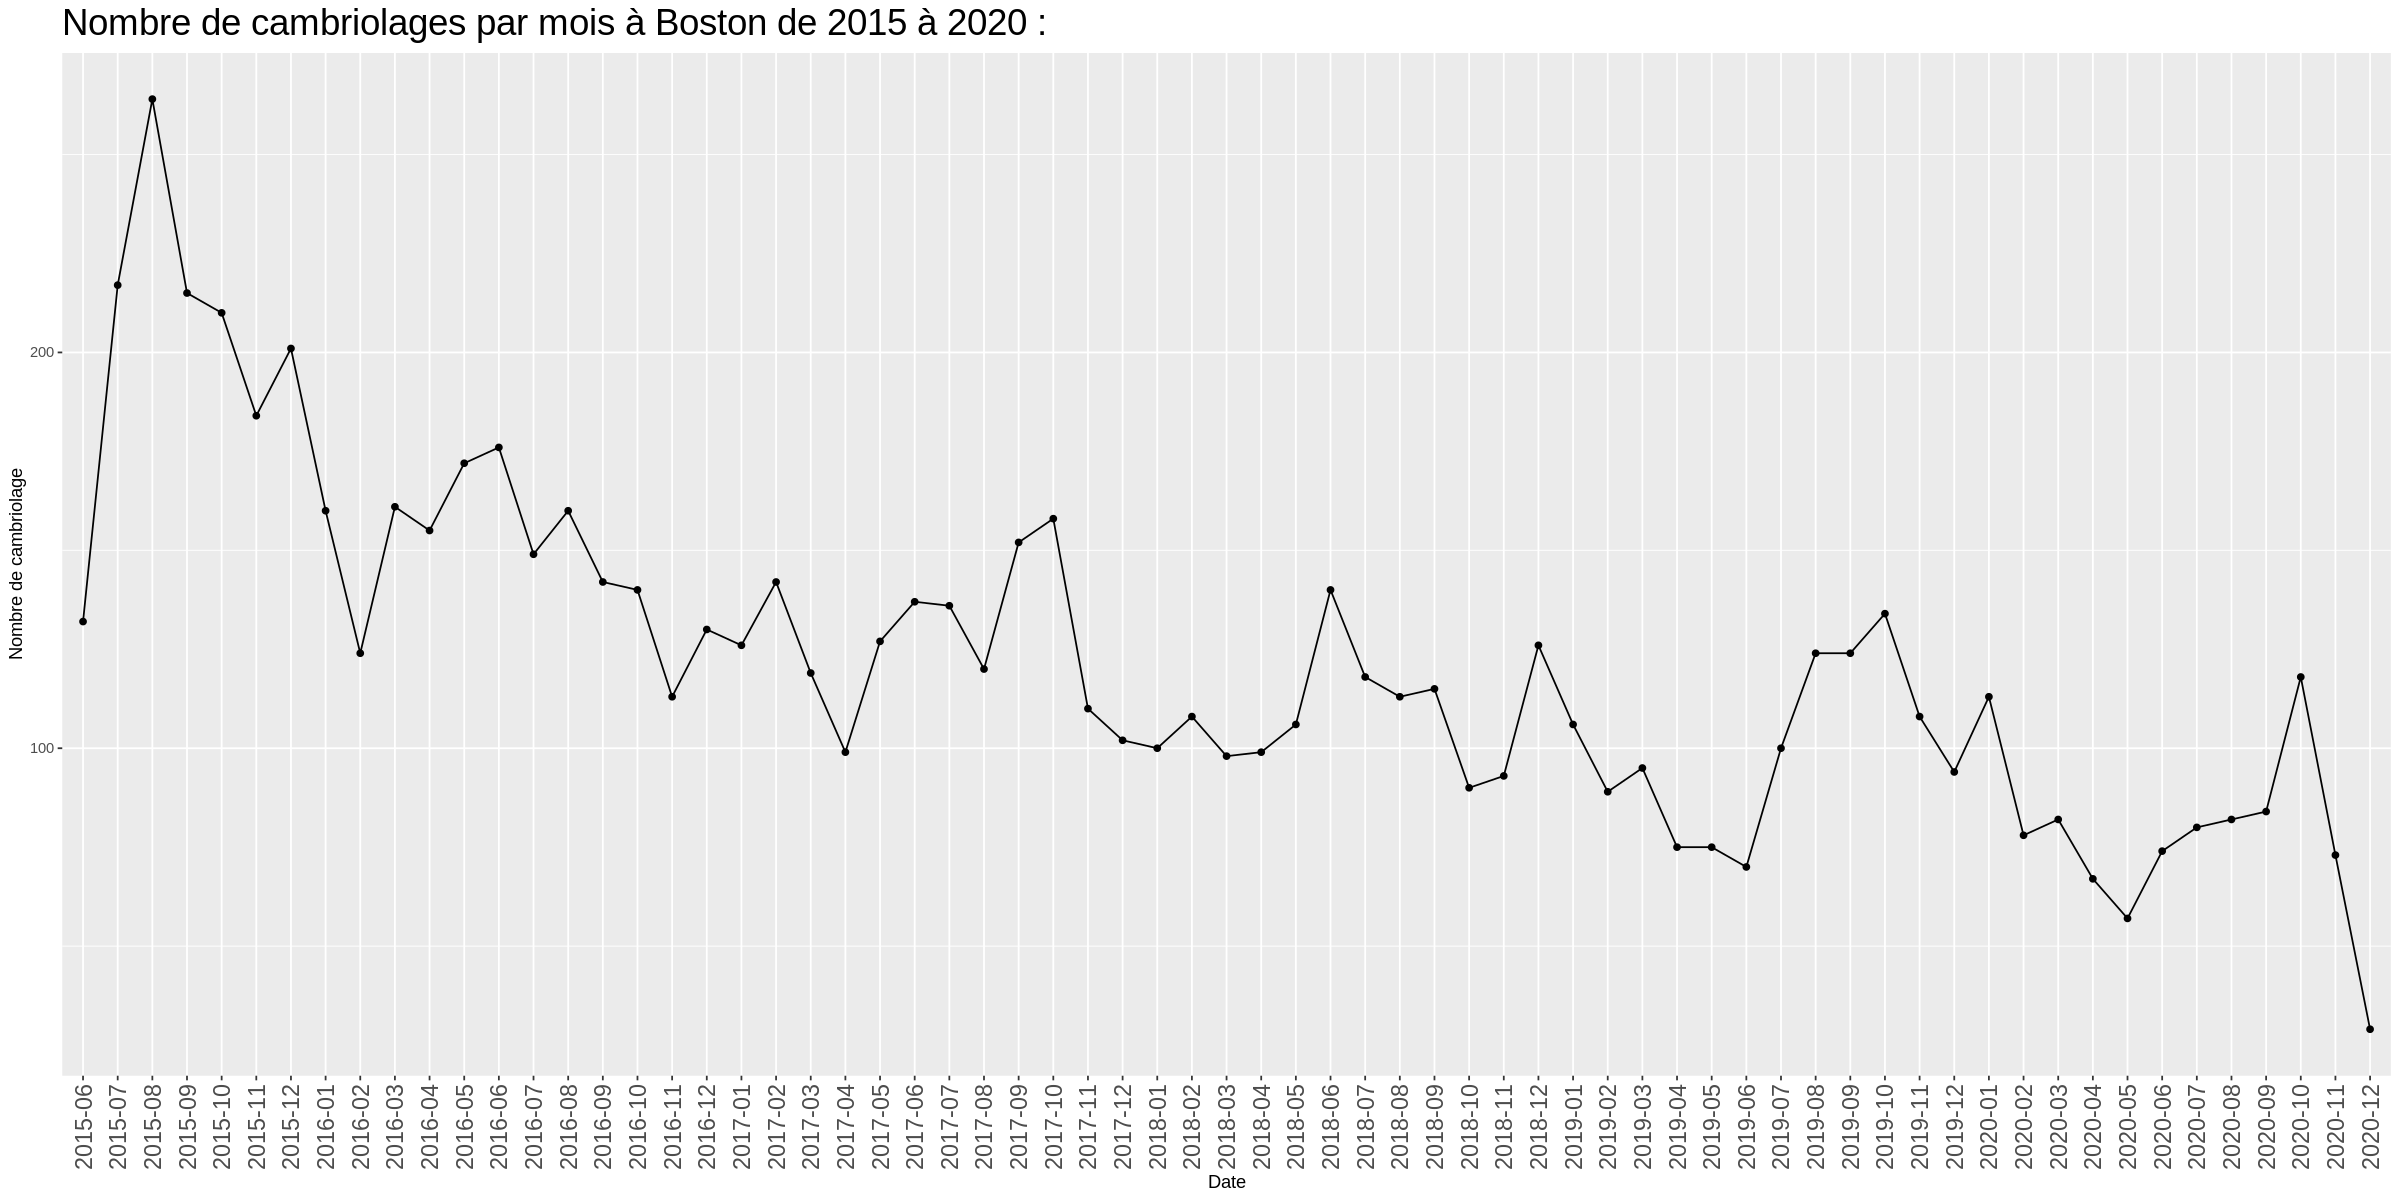

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)

subset <- df %>%
          filter(OFFENSE_CODE_GROUP == "Residential Burglary") %>%
          mutate(Month_yr = factor(substr(OCCURRED_ON_DATE,0,7)))%>%
          select(OFFENSE_CODE_GROUP,Month_yr)%>%
          group_by(Month_yr)%>%

          summarise(nb = n())


ggplot(data = subset,aes(x = Month_yr,y=nb,group=1))+
geom_point(stat='summary', fun=sum) +
stat_summary(fun=sum, geom="line")+
.theme(axis.text.x = element_text(size=14,angle = 90, vjust = 0.5, hjust=1),plot.title = element_text(size=22))+
ggtitle("Nombre de cambriolages par mois à Boston de 2015 à 2020 : ") +
xlab("Date") + 
ylab("Nombre de cambriolage")

Le nombre de cambriolages diminuent progressivement dans le temps.